<a href="https://colab.research.google.com/github/fahmiyansyah/Machine_Learning/blob/main/midTerm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Group 3 Member  :**
* Eka Evita A.
* Faricha Aulia
* M. Aristya P.
* Septian Fahmi A.
* M. Asad

## **Midterm Case Study**

1. Select 5 license plate images for each group member from the provided dataset. [DOWNLOAD](https://storage.googleapis.com/kuliah_mah/dummy.zip)
2. Perform segmentation on the license plate images to enhance the characters on the license plates.
3. You can use the K-Means algorithm as explained in previous practical sessions or any other clustering algorithm.
4. You are allowed to perform data preprocessing on the images, such as:
    - Changing the color space
    - Dimension reduction
    - Etc.
5. Display a comparison of the images before and after segmentation.

**Open Challenge** (Optional)
- How can you evaluate the results of the segmentation?
- Apply it to this case!

**Note:**
1. The image loading process is exemplified using the OpenCV library.
2. By default, OpenCV will load images in the BGR format.

## **Method 1**

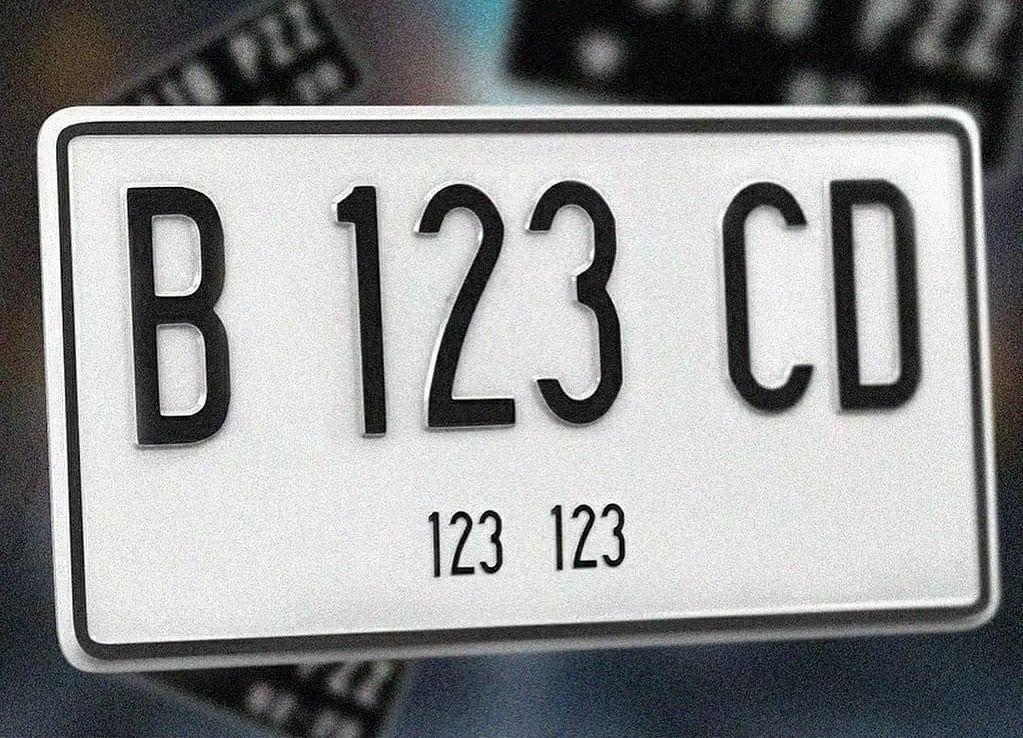

738
1023
3


(754974, 3)

In [ ]:
# import library
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from google.colab import drive

# load the image
img = cv.imread('/content/019_jpg.rf.e73938ec62074bbde822f7d5a084bdef.jpg')

# show image
cv2_imshow(img)

# image dimensions
h, w, ch= img.shape
print(h)
print(w)
print(ch)

# normalize the pixel values to the range [0, 1]
data = img / 255.0

# reshape the data to have one row per pixel and one column per color channel
data = data.reshape(h * w, ch)
data.shape

In [ ]:
%matplotlib inline

In [ ]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    # create a subplot with 2 scatter plots
    fig, ax = plt.subplots(1, 2, figsize=(8, 4))

    # first scatter plot (red vs. green)
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    # second scatter plot (red vs. blue)
    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    # add a title to the entire figure
    fig.suptitle(title, size=14)

    plot_pixels(data, title='Input color space: 16 million possible colors')
    plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


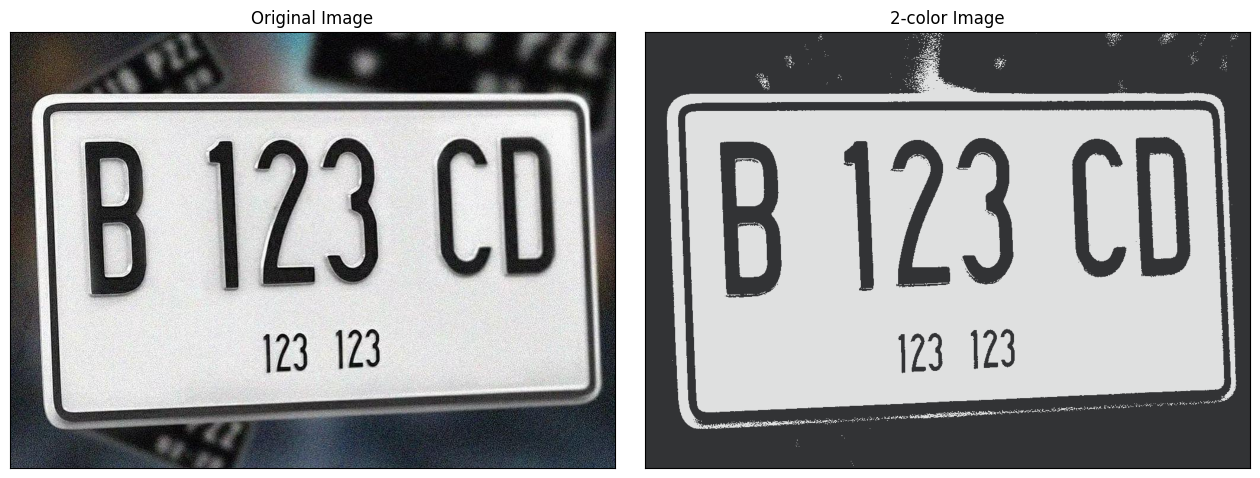

In [ ]:
import cv2

# perform k-means clustering to reduce colors
from sklearn.cluster import KMeans

K = 2  # number of clusters
kmeans = KMeans(n_clusters=K, random_state=0).fit(data)
new_colors = kmeans.cluster_centers_[kmeans.labels_]

# reshape the recolored data
img_recolored = (new_colors * 255).astype(np.uint8).reshape(img.shape)

# display images
fig, ax = plt.subplots(1, 2, figsize=(16, 6), subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original Image', size=12)
ax[1].imshow(cv2.cvtColor(img_recolored, cv2.COLOR_BGR2RGB))
ax[1].set_title('2-color Image', size=12)
plt.show()

**Evaluate**

In [ ]:
from sklearn.metrics import silhouette_score

# Evaluate the quality of clustering using silhouette score
silhouette_avg = silhouette_score(data, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg:.2f}")

# Calculate the within-cluster sum of squares (WCSS)
wcss = sum(np.min(kmeans.transform(data), axis=1))

print(f"Within-Cluster Sum of Squares (WCSS): {wcss:.2f}")


Silhouette Score: 0.82
Within-Cluster Sum of Squares (WCSS): 99679.38


In [ ]:
# Define a list of image file paths
image_paths = [
    '/content/27-E-3524-PAG-09-21_jpeg.rf.e30aee9dd8939945334bd78eabb7501e.jpg',
    '/content/17-E-4172-QC-11-18_jpg.rf.242a2fe2326bfdc57b7473d7a998c351.jpg',
    '/content/22-E-5234-YF-11-20_jpeg.rf.4e1ab567405d90ef53329797f1f6dab5.jpg',
    '/content/25-E-2101-PAD-06-21_jpeg.rf.fb688472f5ba9c0c445f9d9330f39508.jpg',
    '/content/26-E-4016-TO-08-22_jpeg.rf.8c72fd54437debb496cef33f54cfd44a.jpg'
]

# Define the number of clusters (K)
K = 2

for image_path in image_paths:
    # Load the image
    img = cv.imread(image_path)

    h, w, ch = img.shape

    data = img / 255.0
    data = data.reshape(h * w, ch)

    # Perform K-Means clustering to reduce colors
    kmeans = KMeans(n_clusters=K, random_state=0).fit(data)
    new_colors = kmeans.cluster_centers_[kmeans.labels_]

    # Reshape the recolored data
    img_recolored = (new_colors * 255).astype(np.uint8).reshape(img.shape)

    # Display the original and recolored images
    fig, ax = plt.subplots(1, 2, figsize=(16, 6), subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(wspace=0.05)
    ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax[0].set_title('Original Image', size=16)
    ax[1].imshow(cv2.cvtColor(img_recolored, cv2.COLOR_BGR2RGB))
    ax[1].set_title('2-color Image', size=16)
    plt.show()

### Method 2



In [ ]:
# Load the license plate image
image_path = '/content/019_jpg.rf.e73938ec62074bbde822f7d5a084bdef.jpg'
original_image = cv2.imread(image_path)

# Convert the image to grayscale (you can choose a different color space if needed)
gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

# Apply K-Means clustering to segment the license plate
# You can adjust the number of clusters (K) based on your specific image
K = 3  # Number of clusters
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
_, labels, centers = cv2.kmeans(gray_image.reshape(-1, 1).astype(np.float32), K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
segmented_image = centers[labels.flatten()].reshape(gray_image.shape)

# Display the original and segmented images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(segmented_image, cmap='gray')
plt.title("Segmented Image")
plt.axis('off')

plt.show()

Evaluate

In [ ]:
from skimage.metrics import structural_similarity as ssim
from sklearn.metrics import mean_squared_error

# Load the original license plate image (in grayscale)
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Convert the segmented image to grayscale
segmented_image_gray = segmented_image.astype(np.uint8)

# Calculate SSIM
ssim_score = ssim(original_image, segmented_image_gray)

# Calculate MSE
mse = mean_squared_error(original_image, segmented_image_gray)

print(f"SSIM: {ssim_score:.2f}")
print(f"MSE: {mse:.2f}")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Define a list of image file paths
image_paths = [
    '/content/27-E-3524-PAG-09-21_jpeg.rf.e30aee9dd8939945334bd78eabb7501e.jpg',
    '/content/17-E-4172-QC-11-18_jpg.rf.242a2fe2326bfdc57b7473d7a998c351.jpg',
    '/content/22-E-5234-YF-11-20_jpeg.rf.4e1ab567405d90ef53329797f1f6dab5.jpg',
    '/content/25-E-2101-PAD-06-21_jpeg.rf.fb688472f5ba9c0c445f9d9330f39508.jpg',
    '/content/26-E-4016-TO-08-22_jpeg.rf.8c72fd54437debb496cef33f54cfd44a.jpg'
]

# Define the number of clusters (K)
K = 3  # Number of clusters

for image_path in image_paths:
    # Load the license plate image
    original_image = cv2.imread(image_path)

    # Convert the image to grayscale
    gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

    # Apply K-Means clustering to segment the license plate
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    _, labels, centers = cv2.kmeans(gray_image.reshape(-1, 1).astype(np.float32), K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    segmented_image = centers[labels.flatten()].reshape(gray_image.shape)

    # Display the original and segmented images
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(segmented_image, cmap='gray')
    plt.title("Segmented Image")
    plt.axis('off')

    plt.show()

Method 3

In [ ]:
# Load the license plate image
image_path = '/content/019_jpg.rf.e73938ec62074bbde822f7d5a084bdef.jpg'
original_image = cv2.imread(image_path)

# Convert the image to grayscale (you can choose a different color space if needed)
gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

In [ ]:
from sklearn.cluster import SpectralClustering

# Reshape the gray_image to a vector
data = gray_image.reshape(-1, 1)

# Apply Spectral Clustering
K = 3  # Number of clusters
spectral_clustering = SpectralClustering(n_clusters=K, eigen_solver='arpack', affinity='nearest_neighbors')
spectral_clustering.fit(data)

# Get cluster labels
labels = spectral_clustering.labels_

# Reshape the cluster labels to the shape of the original image
segmented_image = labels.reshape(gray_image.shape)

In [ ]:
# Define a list of image file paths
image_paths = [
    '/content/27-E-3524-PAG-09-21_jpeg.rf.e30aee9dd8939945334bd78eabb7501e.jpg',
    '/content/17-E-4172-QC-11-18_jpg.rf.242a2fe2326bfdc57b7473d7a998c351.jpg',
    '/content/22-E-5234-YF-11-20_jpeg.rf.4e1ab567405d90ef53329797f1f6dab5.jpg',
    '/content/25-E-2101-PAD-06-21_jpeg.rf.fb688472f5ba9c0c445f9d9330f39508.jpg',
    '/content/26-E-4016-TO-08-22_jpeg.rf.8c72fd54437debb496cef33f54cfd44a.jpg'
]

# Define the number of clusters (K)
K = 3  # Number of clusters

for image_path in image_paths:
    # Load the license plate image
    original_image = cv2.imread(image_path)

    # Convert the image to grayscale
    gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

    # Apply Spectral Clustering
    spectral_clustering = SpectralClustering(n_clusters=K, eigen_solver='arpack', affinity='nearest_neighbors')
    labels = spectral_clustering.fit_predict(gray_image)

    # Reshape the cluster labels to the shape of the original image
    segmented_image = labels.reshape(gray_image.shape)

    # Display the original and segmented images
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(segmented_image, cmap='gray')
    plt.title("Segmented Image (Spectral Clustering)")
    plt.axis('off')

    plt.show()